# Modeling and Simulation in Python

Chapter 13

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [13]:
def make_system(beta, gamma):
    
    init = State(S=89, I=1, R=0)
    init /= np.sum(init)

    t_0 = 0
    t_end = 7 * 14

    return System(init=init, t_0=t_0, t_end=t_end,
                  beta=beta, gamma=gamma)

In [14]:
def slope_func(state, t, system):
    unpack(system)
    s, i, r = state

    infected = beta * i * s    
    recovered = gamma * i
    
    dsdt = -infected
    didt = infected - recovered
    drdt = recovered
    
    return dsdt, didt, drdt

In [15]:
system = make_system(0.333, 0.25)
slope_func(init, 0, system)

(-0.003658888888888889, 0.0008811111111111112, 0.002777777777777778)

In [16]:
system = make_system(0.333, 0.25)
results, details = run_ode_solver(system, slope_func, max_step = 1)

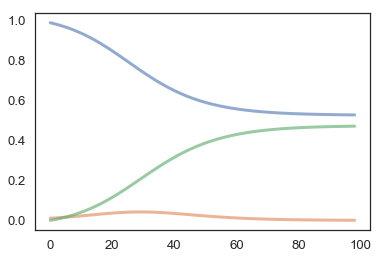

In [17]:
plot(results.S)
plot(results.I)
plot(results.R)